Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4113 - loss: 0.8401 - val_accuracy: 0.5750 - val_loss: 0.6460
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7494 - loss: 0.5794 - val_accuracy: 0.9000 - val_loss: 0.4674
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8251 - loss: 0.4196 - val_accuracy: 0.9250 - val_loss: 0.3485
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9635 - loss: 0.3168 - val_accuracy: 0.9500 - val_loss: 0.2681
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9283 - loss: 0.2954 - val_accuracy: 0.9750 - val_loss: 0.2109
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9766 - loss: 0.2316 - val_accuracy: 0.9750 - val_loss: 0.1703
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9638 - loss: 0.1852 - val_accuracy: 0.9750 - val_loss: 0.1420
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9612 - loss: 0.1469 - val_accuracy: 0.9750 - val_loss: 0.1204
E

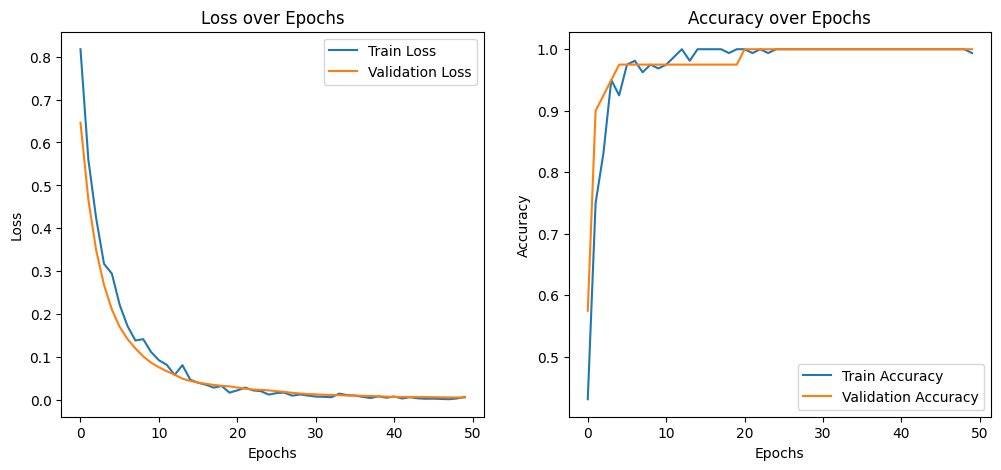

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
file_path = "ckd-dataset-v2.csv"
ckd_data = pd.read_csv(file_path)

# Drop the first two rows(description and blank data)
ckd_data_cleaned = ckd_data.iloc[2:].reset_index(drop=True)

# Rename the "class" column to "target"
if 'class' in ckd_data_cleaned.columns:
    ckd_data_cleaned.rename(columns={'class': 'target'}, inplace=True)

# Encode all columns to numeric values
label_encoder = LabelEncoder()
for col in ckd_data_cleaned.columns:
    ckd_data_cleaned[col] = label_encoder.fit_transform(ckd_data_cleaned[col].astype(str))

# Separate features and target (X feature, Y target)
X = ckd_data_cleaned.drop(columns=['target'])
y = ckd_data_cleaned['target']

# Normalize feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define ANN architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Print
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



# Plot result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()